# Импорт библиотек

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Загрузка данных

In [6]:
image_path = 'tipovikmatan.jpg'
color_image = cv2.imread(image_path)
color_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

# Размеры изображения

In [7]:
height, width, channels = color_image.shape
print(f"Размеры изображения: {width}x{height}, Каналы: {channels}")

Размеры изображения: 640x640, Каналы: 3


In [8]:
r_channel = color_image[:, :, 0]  # Красный канал
g_channel = color_image[:, :, 1]  # Зеленый канал
b_channel = color_image[:, :, 2]  # Синий канал

# Пространственные области изображения по отдельности

(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

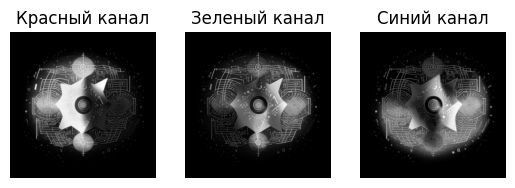

In [9]:
plt.subplot(2, 3, 1)
plt.imshow(r_channel, cmap='gray')
plt.title('Красный канал')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(g_channel, cmap='gray')
plt.title('Зеленый канал')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(b_channel, cmap='gray')
plt.title('Синий канал')
plt.axis('off')

# Парные комбинации пространственных областей изображения

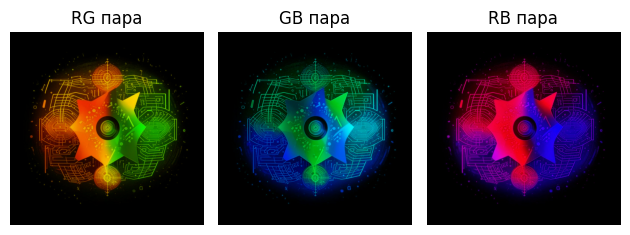

In [10]:
rg_pair = np.stack((r_channel, g_channel, np.zeros_like(r_channel)), axis=-1)
gb_pair = np.stack((np.zeros_like(g_channel), g_channel, b_channel), axis=-1)
rb_pair = np.stack((r_channel, np.zeros_like(b_channel), b_channel), axis=-1)

plt.subplot(2, 3, 4)
plt.imshow(rg_pair)
plt.title('RG пара')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(gb_pair)
plt.title('GB пара')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(rb_pair)
plt.title('RB пара')
plt.axis('off')

plt.tight_layout()
plt.show()

# Серое изображение

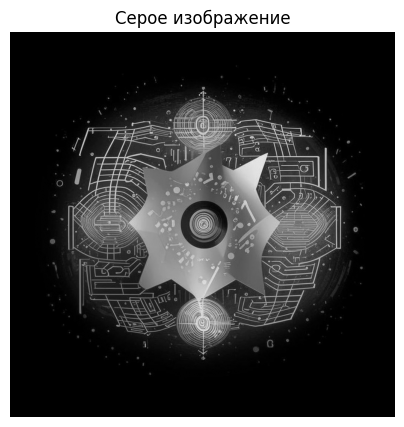

In [11]:
gray_image = cv2.cvtColor(color_image, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(5, 5))
plt.imshow(gray_image, cmap='gray')
plt.title('Серое изображение')
plt.axis('off')
plt.show()

# Графики изменения частоты каналов

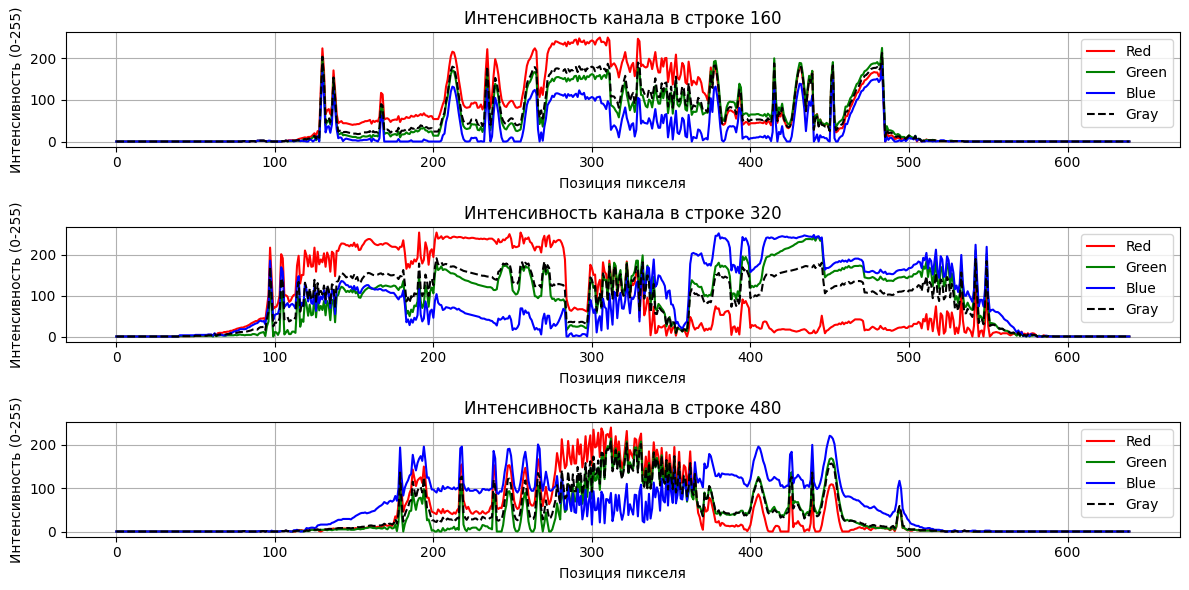

In [12]:
selected_rows = [height//4, height//2, 3*height//4]
plt.figure(figsize=(12, 6))

for i, row in enumerate(selected_rows):
    r_values = color_image[row, :, 0]
    g_values = color_image[row, :, 1]
    b_values = color_image[row, :, 2]
    gray_values = gray_image[row, :]

    plt.subplot(3, 1, i+1)
    plt.plot(r_values, label='Red', color='r')
    plt.plot(g_values, label='Green', color='g')
    plt.plot(b_values, label='Blue', color='b')
    plt.plot(gray_values, label='Gray', color='k', linestyle='--')
    plt.title(f'Интенсивность канала в строке {row}')
    plt.xlabel('Позиция пикселя')
    plt.ylabel('Интенсивность (0-255)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [13]:
def convolve(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape

    pad_h = kh // 2
    pad_w = kw // 2
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    output = np.zeros_like(image, dtype=float)

    for i in range(h):
        for j in range(w):
            output[i, j] = np.sum(kernel * padded_image[i:i+kh, j:j+kw])

    return output

# Искаженное изображение после свертки

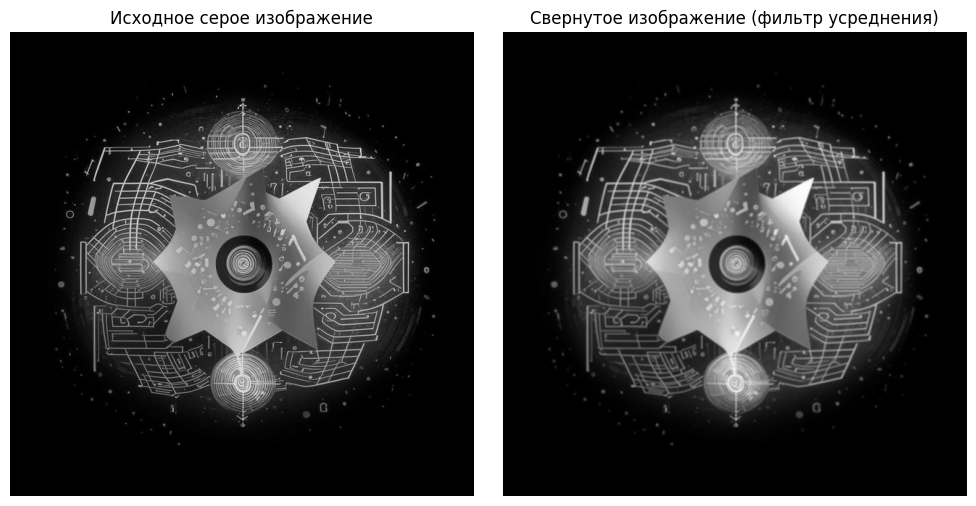

In [14]:
kernel = np.ones((3, 3)) / 9
convolved_image = convolve(gray_image, kernel)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Исходное серое изображение')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(convolved_image, cmap='gray')
plt.title('Свернутое изображение (фильтр усреднения)')
plt.axis('off')

plt.tight_layout()
plt.show()